## Analysis of Epinions Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned Epinions sub-dataset that is different from the one in Portfolio 1. 

### Import Cleaned Epinions Dataset
The csv file named 'Epinions_cleaned_data_portfolio_2.csv'is provided. Please import the csv file (i.e., 'Epinions_cleaned_data_portfolio_2') and print out its total length.

In [62]:
# your code and solution

# importing all libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [63]:
# reading the data [csv file]
test_data= 'Epinions_cleaned_data_portfolio_2.csv'
data_frame= pd.read_csv(test_data)

In [64]:
# viewing data

data_frame

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies
...,...,...,...,...,...,...,...,...
2894,10815,112799,I dare you to sleep through this soon to be cl...,Sleepy Hollow,5.0,4.0,F,Movies
2895,10815,121299,Another movie to keep us out of the water!!!!,Deep Blue Sea,5.0,3.0,F,Movies
2896,10815,121399,Miles above other films.,Green Mile,5.0,4.0,F,Movies
2897,10815,121499,This could be the beginning of a comedy era.,Austin Powers: The Spy Who Shagged Me,3.0,4.0,F,Movies


In [65]:
cleaning_data=data_frame.drop(['timestamp', 'userId'], axis=1)

In [66]:
# shape of the data

print(data_frame.shape)
print(cleaning_data.shape)

(2899, 8)
(2899, 6)


In [67]:
# count the size of the data using len() function

rows = len(data_frame.axes[0])
columns = len(data_frame.axes[1])

print('The Epinions data has:', rows, 'rows')
print('The Epinions data has:', columns, 'columns')

print('')
print('')

rows = len(cleaning_data.axes[0])
columns = len(cleaning_data.axes[1])

print('The cleaned Epinions data has:', rows, 'rows')
print('The cleaned Epinions data has:', columns, 'columns')

The Epinions data has: 2899 rows
The Epinions data has: 8 columns


The cleaned Epinions data has: 2899 rows
The cleaned Epinions data has: 6 columns


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating (positive or negative). Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [68]:
# using head()

cleaning_data.head()

,review,item,rating,helpfulness,gender,category
0,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
1,Shocking!,Sixth Sense,5.0,4.0,F,Movies
2,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
3,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies


In [69]:
# using info()

cleaning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review       2899 non-null   object 
 1   item         2899 non-null   object 
 2   rating       2899 non-null   float64
 3   helpfulness  2899 non-null   float64
 4   gender       2899 non-null   object 
 5   category     2899 non-null   object 
dtypes: float64(2), object(4)
memory usage: 136.0+ KB


In [70]:
cleaning_data.corr()

,rating,helpfulness
rating,1.000000,-0.016832
helpfulness,-0.016832,1.000000


In [71]:
ord_enc = OrdinalEncoder()

cleaning_data["category code"] = ord_enc.fit_transform(cleaning_data[["category"]])
cleaning_data[["category", "category code"]]

,category,category code
0,Online Stores & Services,6.0
1,Movies,5.0
2,Movies,5.0
3,Movies,5.0
4,Movies,5.0
...,...,...
2894,Movies,5.0
2895,Movies,5.0
2896,Movies,5.0
2897,Movies,5.0


In [72]:
ord_enc = OrdinalEncoder()

cleaning_data["review code"] = ord_enc.fit_transform(cleaning_data[["review"]])
cleaning_data[["review", "review code"]]

,review,review code
0,"Finally, Something for (Relatively) Nothing",856.0
1,Shocking!,1985.0
2,Simply Shaggadelic!,2006.0
3,Better Than The First!,472.0
4,Blair Witch made me appreciate this,493.0
...,...,...
2894,I dare you to sleep through this soon to be cl...,1221.0
2895,Another movie to keep us out of the water!!!!,379.0
2896,Miles above other films.,1546.0
2897,This could be the beginning of a comedy era.,2431.0


In [73]:
ord_enc = OrdinalEncoder()

cleaning_data["gender code"] = ord_enc.fit_transform(cleaning_data[["gender"]])
cleaning_data[["gender", "gender code"]]

,gender,gender code
0,F,0.0
1,F,0.0
2,F,0.0
3,F,0.0
4,F,0.0
...,...,...
2894,F,0.0
2895,F,0.0
2896,F,0.0
2897,F,0.0


In [74]:
cleaning_data

,review,item,rating,helpfulness,gender,category,category code,review code,gender code
0,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services,6.0,856.0,0.0
1,Shocking!,Sixth Sense,5.0,4.0,F,Movies,5.0,1985.0,0.0
2,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies,5.0,2006.0,0.0
3,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies,5.0,472.0,0.0
4,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies,5.0,493.0,0.0
...,...,...,...,...,...,...,...,...,...
2894,I dare you to sleep through this soon to be cl...,Sleepy Hollow,5.0,4.0,F,Movies,5.0,1221.0,0.0
2895,Another movie to keep us out of the water!!!!,Deep Blue Sea,5.0,3.0,F,Movies,5.0,379.0,0.0
2896,Miles above other films.,Green Mile,5.0,4.0,F,Movies,5.0,1546.0,0.0
2897,This could be the beginning of a comedy era.,Austin Powers: The Spy Who Shagged Me,3.0,4.0,F,Movies,5.0,2431.0,0.0


In [75]:
cleaning_data.corr()

,rating,helpfulness,category code,review code,gender code
rating,1.000000,-0.016832,-0.140576,-0.062071,0.018105
helpfulness,-0.016832,1.000000,-0.000189,0.016170,-0.046627
category code,-0.140576,-0.000189,1.000000,0.012047,-0.017644
review code,-0.062071,0.016170,0.012047,1.000000,-0.014422
gender code,0.018105,-0.046627,-0.017644,-0.014422,1.000000


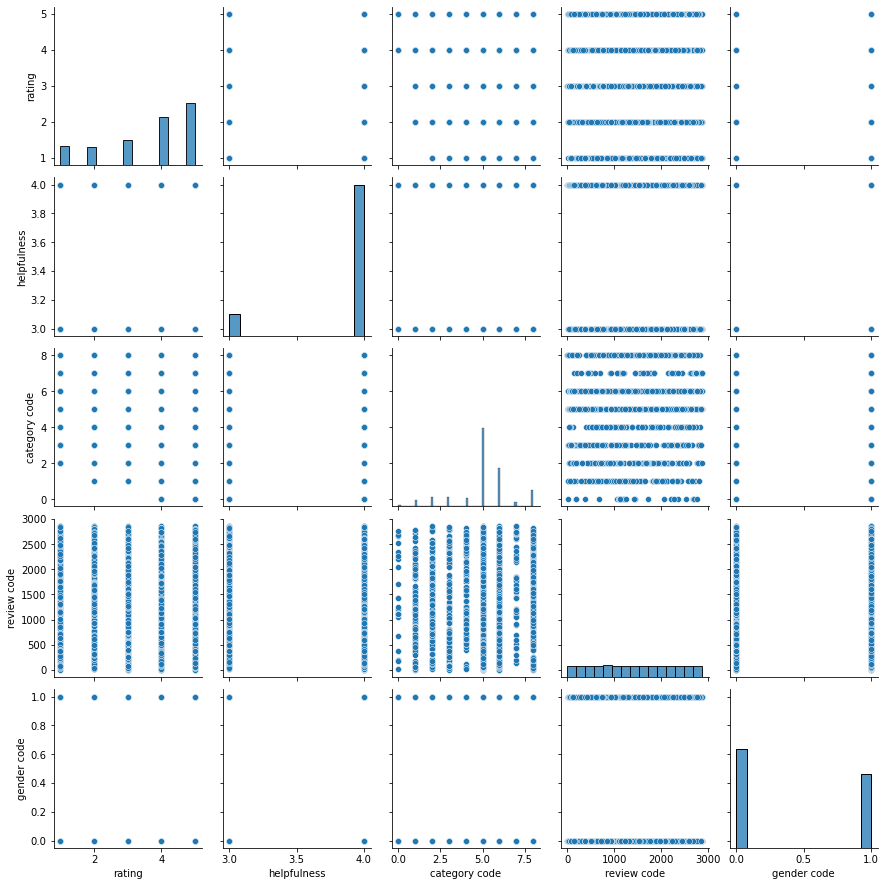

In [76]:
sns.pairplot(cleaning_data)

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [77]:
# Case 1 ->

case1_train, case1_test= train_test_split(cleaning_data, test_size=0.9, random_state=12)
print('the number of rows in training data are(shape):', case1_train.shape[0])
print('the number of columns in training data are(shape):', case1_train.shape[1])

print('')
print('')

print('the number of rows in testing data are(shape):', case1_test.shape[0])
print('the number of columns in testing data are(shape):', case1_test.shape[1])

the number of rows in training data are(shape): 289
the number of columns in training data are(shape): 9


the number of rows in testing data are(shape): 2610
the number of columns in testing data are(shape): 9


In [78]:
# Case 2 ->

case2_train, case2_test= train_test_split(cleaning_data, test_size=0.1, random_state=12)
print('the number of rows in training data are(shape):', case2_train.shape[0])
print('the number of columns in training data are(shape):', case2_train.shape[1])

print('')
print('')

print('the number of rows in testing data are (shape):', case2_test.shape[0])
print('the number of columns in testing data are(shape):', case2_test.shape[1])

the number of rows in training data are(shape): 2609
the number of columns in training data are(shape): 9


the number of rows in testing data are (shape): 290
the number of columns in testing data are(shape): 9


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select __two most correlated features and two least correlated features__ regarding rating, respectively. 
* Train __four__ linear regression models by following the conditions:
    - (model-a) using the training/testing data in __case 1__ with __two most__ correlated input features
    - (model-b) using the training/testing data in __case 1__ with __two least__ correlated input features
    - (model-c) using the training/testing data in __case 2__ with __two most__ correlated input features
    - (model-d) using the training/testing data in __case 2__ with __two least__ correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [79]:
# model-a

reg= linear_model.LinearRegression()


x_train = case1_train[['rating']]
y_train = case1_train['review code']

x_test= case1_test[['rating']]
y_test = case1_test['review code']

reg.fit(x_train, y_train)

case1_predicted_train= reg.predict(x_train)

print('Training Data')
print('mean square error:', mean_squared_error(y_train, case1_predicted_train))
print('mean absolute error:', mean_absolute_error(y_train, case1_predicted_train))
print('mean square root error:', np.sqrt(mean_squared_error(y_train, case1_predicted_train)))
print(' r square:' , r2_score(y_train, case1_predicted_train))

print('')
print('')
print('')

case1_predicted_test= reg.predict(x_test)

print('Testing Data')
print('mean squared error:', mean_squared_error(y_test, case1_predicted_test))
print('mean absolute error:', mean_absolute_error(y_test, case1_predicted_test))
print(' mean square root error:', np.sqrt(mean_squared_error(y_test, case1_predicted_test)))
print('r square:', r2_score(y_test, case1_predicted_test))


Training Data
mean square error: 610631.8299795456
mean absolute error: 662.7603070549351
mean square root error: 781.4293506002609
 r square: 0.000462185375929125



Testing Data
mean squared error: 692399.4647339318
mean absolute error: 722.7844895695026
 mean square root error: 832.1054408750923
r square: -0.005364068485075535


In [80]:
# model-b

reg= linear_model.LinearRegression()


x_train = case1_train[['category code']]
y_train = case1_train['helpfulness']

x_test= case1_test[['category code']]
y_test = case1_test['helpfulness']

reg.fit(x_train, y_train)

case1_predicted_train= reg.predict(x_train)

print('Training Data')
print('mean square error:', mean_squared_error(y_train, case1_predicted_train))
print('mean absolute error:', mean_absolute_error(y_train, case1_predicted_train))
print('mean square root error:', np.sqrt(mean_squared_error(y_train, case1_predicted_train)))
print(' r square:' , r2_score(y_train, case1_predicted_train))

print('')
print('')
print('')

case1_predicted_test= reg.predict(x_test)

print('Testing Data')
print('mean squared error:', mean_squared_error(y_test, case1_predicted_test))
print('mean absolute error:', mean_absolute_error(y_test, case1_predicted_test))
print(' mean square root error:', np.sqrt(mean_squared_error(y_test, case1_predicted_test)))
print('r square:', r2_score(y_test, case1_predicted_test))

Training Data
mean square error: 0.10376584193602316
mean absolute error: 0.2075316838720465
mean square root error: 0.322127058683407
 r square: 0.0003890560163102297



Testing Data
mean squared error: 0.10969275736356651
mean absolute error: 0.21372453790334675
 mean square root error: 0.33119896944822536
r square: -0.0009336827265367109


In [81]:
# model-c

reg= linear_model.LinearRegression()


x_train = case2_train[['rating']]
y_train = case2_train['review code']

x_test= case2_test[['rating']]
y_test = case2_test['review code']

reg.fit(x_train, y_train)

case2_predicted_train= reg.predict(x_train)

print('Training Data')
print('mean square error:', mean_squared_error(y_train, case2_predicted_train))
print('mean absolute error:', mean_absolute_error(y_train, case2_predicted_train))
print('mean square root error:', np.sqrt(mean_squared_error(y_train, case2_predicted_train)))
print(' r square:' , r2_score(y_train, case2_predicted_train))

print('')
print('')
print('')

case2_predicted_test= reg.predict(x_test)

print('Testing Data')
print('mean squared error:', mean_squared_error(y_test, case2_predicted_test))
print('mean absolute error:', mean_absolute_error(y_test, case2_predicted_test))
print(' mean square root error:', np.sqrt(mean_squared_error(y_test, case2_predicted_test)))
print('r square:', r2_score(y_test, case2_predicted_test))

Training Data
mean square error: 678648.5742701722
mean absolute error: 712.5780786010343
mean square root error: 823.8012953802465
 r square: 0.004949366967388125



Testing Data
mean squared error: 677297.6152936277
mean absolute error: 713.2618570020035
 mean square root error: 822.9809325212995
r square: -0.010250365644651094


In [82]:
# model-d

reg= linear_model.LinearRegression()


x_train = case2_train[['category code']]
y_train = case2_train['helpfulness']

x_test= case2_test[['category code']]
y_test = case2_test['helpfulness']

reg.fit(x_train, y_train)

case2_predicted_train= reg.predict(x_train)

print('Training Data')
print('mean square error:', mean_squared_error(y_train, case2_predicted_train))
print('mean absolute error:', mean_absolute_error(y_train, case2_predicted_train))
print('mean square root error:', np.sqrt(mean_squared_error(y_train, case2_predicted_train)))
print(' r square:' , r2_score(y_train, case2_predicted_train))

print('')
print('')
print('')

case2_predicted_test= reg.predict(x_test)

print('Testing Data')
print('mean squared error:', mean_squared_error(y_test, case2_predicted_test))
print('mean absolute error:', mean_absolute_error(y_test, case2_predicted_test))
print(' mean square root error:', np.sqrt(mean_squared_error(y_test, case2_predicted_test)))
print('r square:', r2_score(y_test, case2_predicted_test))

Training Data
mean square error: 0.11105394562354484
mean absolute error: 0.22210789124708968
mean square root error: 0.33324757407000705
 r square: 4.3662872914129736e-05



Testing Data
mean squared error: 0.09083106814873573
mean absolute error: 0.2017413413067747
 mean square root error: 0.301381930693822
r square: -0.009234090541508255


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

#### It is done in the above step (model evaluation)

### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

<AxesSubplot:>

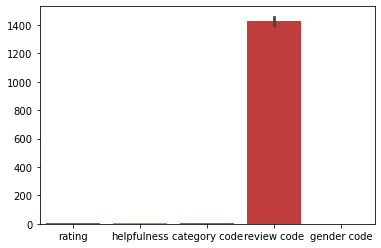

In [83]:
sns.barplot(data=cleaning_data)

<AxesSubplot:>

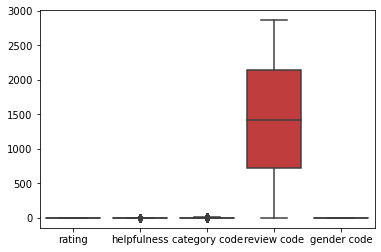

In [84]:
sns.boxplot(data=cleaning_data)
